# Bayesian AB testing for Swedish Fish Inc.

Reproduction of the *Bayesian AB testing for Swedish Fish Inc.* presented by Rasmus Bååth in his [Introduction to Bayesian Data Analysis](http://www.sumsar.net/blog/2017/02/introduction-to-bayesian-data-analysis-part-one/).

### Method A 
Offer a brochure advertising a one-year subscription to get a salmon by mail. After the campaign, a marketing determined that 6 out 16 people who received the brocure signed up for an annual subscription.
**Goal:** use Bayesian data analysis to determine the sign-up probability based on the data gathered by the marketing team.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(rc={'figure.facecolor':'white'})
plt.rc('text', usetex=True)
# plt.rc('font', family='serif')
from time import time
# import random
# random.seed(123)

In [2]:
observed_data = 6

In [3]:
n_sample = 100000
prior = np.random.uniform(low=0, high=1, size=n_sample)

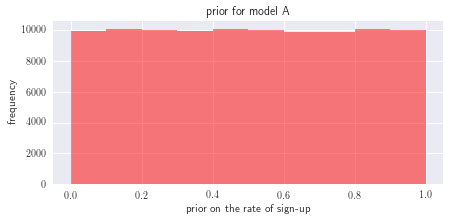

In [4]:
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(7, 3)
ax.hist(prior, color='r', alpha=0.5)
ax.set_title('prior for model A')
ax.set_xlabel('prior on the rate of sign-up')
ax.set_ylabel('frequency');

In [5]:
def generative_model(theta):
    return np.random.binomial(n=16, p=theta)

In [6]:
simulated_data = [generative_model(theta) for theta in prior]

In [7]:
# filter only values of theta that poduce the observed data
posterior = [prior[idx] for idx, value in enumerate(simulated_data) if value == observed_data]
len(posterior)

5817

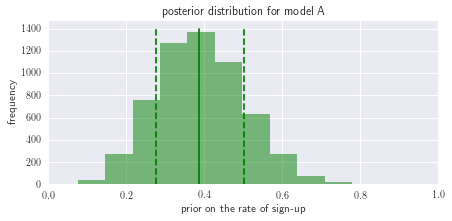

In [30]:
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(7, 3)
ax.hist(posterior, color='g', alpha=0.5)
y_max = 1400
p16 = np.percentile(posterior, 16)
p50 = np.percentile(posterior, 50)
p84 = np.percentile(posterior, 84)
ax.plot([p16, p16], [0, y_max], 'g--')
ax.plot([p84, p84], [0, y_max], 'g--')
ax.plot([p50, p50], [0, y_max], 'g-')
ax.set_title('posterior distribution for model A')
ax.set_xlabel('prior on the rate of sign-up')
ax.set_ylabel('frequency')
ax.set_xlim(0, 1);

In [22]:
print(f'percentile 16: {np.percentile(posterior, 16):.2f}')
print(f'percentile 50: {np.percentile(posterior, 50):.2f}')
print(f'percentile 84: {np.percentile(posterior, 84):.2f}')

percentile 16: 0.28
percentile 50: 0.39
percentile 84: 0.50


# Comparison between two models


### Method B 
In addition to the brochure advertising a one-year subscription to get a salmon by mail, include a sample: a free frozen salmon. After the campaign, a marketing determined that this time 10 out 16 people who received the brochure and free sample signed up for an annual subscription.
**Goal:** use Bayesian data analysis to determine the sign-up probability based on the data gathered by the marketing team and compare with *Method A* to determine which campaing method worked best.

In [10]:
observed_data_a = 6
observed_data_b = 10

In [11]:
n_sample = 1000000
prior_a = np.random.uniform(low=0, high=1, size=n_sample)
prior_b = np.random.uniform(low=0, high=1, size=n_sample)

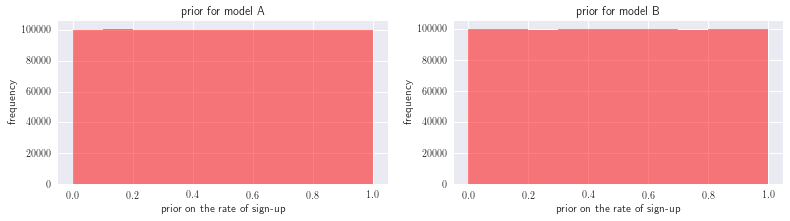

In [12]:
fig, ax = plt.subplots(1, 2)
fig.set_size_inches(13, 3)
ax[0].hist(prior_a, color='r', alpha=0.5)
ax[0].set_title('prior for model A')
ax[0].set_xlabel('prior on the rate of sign-up')
ax[0].set_ylabel('frequency')

ax[1].hist(prior_b, color='r', alpha=0.5)
ax[1].set_title('prior for model B')
ax[1].set_xlabel('prior on the rate of sign-up')
ax[1].set_ylabel('frequency');

In [13]:
simulated_data_a = [generative_model(theta) for theta in prior_a]
simulated_data_b = [generative_model(theta) for theta in prior_b]

In [14]:
# filter only values of theta that poduce the observed data
posterior_a = []
posterior_b = []
for idx, (v_a, v_b) in enumerate(zip(simulated_data_a, simulated_data_b)):
    if (v_a == observed_data_a and
        v_b == observed_data_b):
        posterior_a.append(prior_a[idx])
        posterior_b.append(prior_b[idx])
len(posterior_a), len(posterior_b)

(3518, 3518)

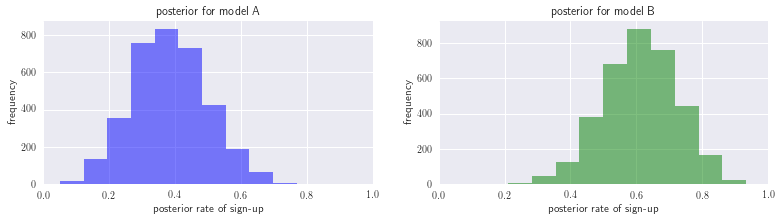

In [15]:
fig, ax = plt.subplots(1, 2)
fig.set_size_inches(13, 3)
ax[0].hist(posterior_a, color='b', alpha=0.5)
ax[0].set_title('posterior for model A')
ax[0].set_xlabel('posterior rate of sign-up')
ax[0].set_ylabel('frequency')
ax[0].set_xlim(0, 1)

ax[1].hist(posterior_b, color='g', alpha=0.5)
ax[1].set_title('posterior for model B')
ax[1].set_xlabel('posterior rate of sign-up')
ax[1].set_ylabel('frequency')
ax[1].set_xlim(0, 1);

In [16]:
post_diff = [x-y for (x,y) in zip(posterior_b, posterior_a)]

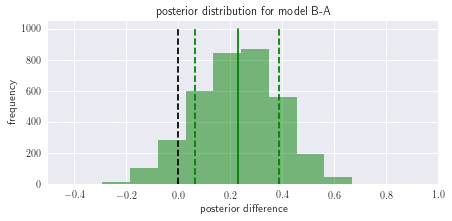

In [32]:
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(7, 3)
ax.hist(post_diff, color='g', alpha=0.5)
ax.set_title('posterior distribution for model B-A')
ax.set_xlabel('posterior difference')
ax.set_ylabel('frequency')
y_max = 1000
ax.plot([0, 0], [0, y_max], 'k--')
p16 = np.percentile(post_diff, 16)
p50 = np.percentile(post_diff, 50)
p84 = np.percentile(post_diff, 84)
ax.plot([p16, p16], [0, y_max], 'g--')
ax.plot([p84, p84], [0, y_max], 'g--')
ax.plot([p50, p50], [0, y_max], 'g-')
ax.set_xlim(-0.5, 1);

In [33]:
print(f'percentile 16: {p16:.2f}')
print(f'percentile 50: {p50:.2f}')
print(f'percentile 84: {p84:.2f}')

percentile 16: 0.07
percentile 50: 0.23
percentile 84: 0.39


In [23]:
cnt = 0
for x in post_diff:
    if x > 0:
        cnt += 1
print('probability of B-A model: {:.2f}'.format(cnt/len(post_diff)))

probability of B-A model: 0.92
